In [1]:
# Exploration & Cleanup:
# I found the source for the first and second dataset (first and second in the order below) thanks to Salvador.
# He found the "Office for National Statistics" website for GB. After some time inside the site, I queried for
# "London Infrastructure", and this eventually gave me my two datasets for infrastructure/construction during,
# before, and after the 2012 London Summer Olymipics. The third dataset comes from "World Development Indicators"
# from "THE WORLD BANK". Salvador found this source as well. I filtered the date to get the dates and topic we
# were looking for. Below, one can find the data-cleaning process of the CSV's in code (w/ comments to accompany
# them).

In [2]:
# The necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
london_1_df = pd.read_csv("COE UKI London Construction Raw total ¬£m.csv", 
                          delimiter = ",", 
                          encoding = "utf-8", 
                          skipinitialspace = True)

london_2_df = pd.read_csv("Infrastructure Construction (New Work) by region, current prices.csv", 
                          delimiter = ",", 
                          encoding = "utf-8", 
                          skipinitialspace = True)

SA_df = pd.read_csv("World Development Indicators - Data SA.csv", 
                    delimiter = ",", 
                    encoding = "utf-8", 
                    skipinitialspace = True)

In [4]:
# Show the initial DataFrame that we have to work with
london_1_df

,Title,COE UKI London Construction Raw total £m
0,CDID,R2ZP
1,Source dataset ID,RAGV
2,PreUnit,£
3,Unit,m
4,Release date,10/12/14
5,Next release,9-Dec-15
6,Important notes,NaN
7,1997,3356
8,1998,3717
9,1999,3775


In [5]:
# Dropping unnecessary rows (dropped years 1997-2004 - b/c construction began in 2005 according to Wikipedia)...
# We will note that the numbers are in millions of pounds
london_1_df = london_1_df.drop(london_1_df.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]])

In [6]:
# Renaming columns...
london_1_df.columns = ["Year", "Contruction Raw Total"]

In [7]:
# Making the values inside the DataFrame integers
london_1_df = london_1_df.astype(int)
# Show the current status of our DataFrame
london_1_df

,Year,Contruction Raw Total
15,2005,5144
16,2006,5727
17,2007,6422
18,2008,6154
19,2009,5568
20,2010,6393
21,2011,5912
22,2012,7336


Text(0, 0.5, 'Construction Raw Total in Millions of Pounds Sterling')

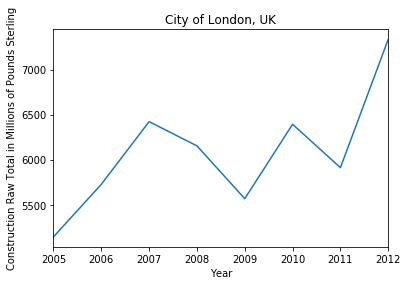

In [8]:
# Plot it
london_1_line_plot = \
london_1_df.plot(kind = "line", x = "Year", y = "Contruction Raw Total", title = "City of London, UK", legend = False)
london_1_line_plot.set_ylabel("Construction Raw Total in Millions of Pounds Sterling")

In [9]:
figure_1 = london_1_line_plot.get_figure()
figure_1.savefig("London Construction Raw Total Line Plot.png")
# This plot shows an upward trend that peaks during Olympics time; unfortunately, there was no data past 2012.

In [10]:
# Show the initial DataFrame that we have to work with
london_2_df

,"Infrastructure Construction (New Work) by region, current prices",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"Great Britain, 2010 to 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,£ million
2,NaN,2010,2011,2012,2013,2014,2015,2016
3,North East,229,444,626,632,861,"1,047",931
4,North West,"1,441","1,391","1,123","1,547","1,757","1,934","2,073"
5,Yorkshire and the Humber,"1,214",991,"1,260","1,533","1,337","1,288","1,019"
6,East Midlands,764,876,953,886,784,"1,331","1,384"
7,West Midlands,807,857,771,782,685,785,782
8,East of England,"1,180","1,397","1,378","1,547","1,668","2,158","2,045"
9,London,"2,975","3,950","3,888","3,379","2,347","2,545","2,839"


In [11]:
# We drop the columns that aren't London
london_2_df = london_2_df.drop(london_2_df.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16]])
# Drop the two years outside of the 5-year period we are looking at (which is '10-'14)
london_2_df = \
london_2_df.drop(["Infrastructure Construction (New Work) by region, current prices", "Unnamed: 6", "Unnamed: 7"], 
                 axis = 1)

In [12]:
# Print the current status of our DF
london_2_df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
9,"2,975","3,950","3,888","3,379","2,347"


In [13]:
# Remember: in current prices
# Rename columns accordingly
london_2_df.columns = ["2010", "2011", "2012", "2013", "2014"]

london_2_df

,2010,2011,2012,2013,2014
9,"2,975","3,950","3,888","3,379","2,347"


In [14]:
# Credit to Salvador for the below - we needed to restructure this DF to make it plottable
years = []
values = []
for value in london_2_df.columns:
    years.append(value)
    values.append(london_2_df.loc[9, value])

london_2_df = pd.DataFrame({"Year": years, "Infrastructure": values})

In [15]:
# The restructured DF
london_2_df

,Year,Infrastructure
0,2010,"2,975"
1,2011,"3,950"
2,2012,"3,888"
3,2013,"3,379"
4,2014,"2,347"


Text(0, 0.5, 'Infrastructure Construction (New Work) in Current Prices')

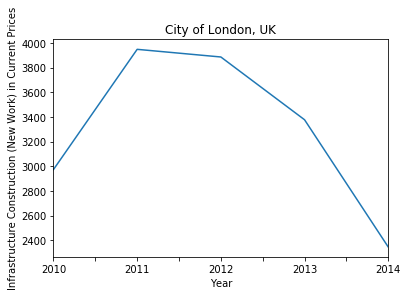

In [16]:
# Data cleaning... strip the leading and trailing spaces
london_2_df["Infrastructure"] = london_2_df["Infrastructure"].str.strip()
# Commas were causing problems - could not convert values from string to int
london_2_df["Infrastructure"] = london_2_df["Infrastructure"].str.replace(",", "")
london_2_df["Infrastructure"] = london_2_df["Infrastructure"].astype(int)
# Finally, plot...
london_2_line_plot = london_2_df.plot(kind = "line", 
                                     x = "Year", 
                                     y = "Infrastructure", 
                                     title = "City of London, UK", 
                                     legend = False)
london_2_line_plot.set_ylabel("Infrastructure Construction (New Work) in Current Prices")

In [17]:
figure_2 = london_2_line_plot.get_figure()
figure_2.savefig("London Infrastructure New Work.png")
# This is a promising plot that we could use in our presentation - it shows infrastructure in London rising then
# peaking at the year of the Olympics; then, it falls down significantly.

In [18]:
# Let's see our initial South Africa DF
SA_df

,Country Name,Country Code,Series Name,Series Code,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
0,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.TOTL.ZS,2.623562e+01,2.652626e+01,2.828426e+01,2.758362e+01,2.738134e+01,2.694254e+01,2.668106e+01,2.666809e+01,2.654514e+01
1,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.TOTL.KD.ZG,4.050267e+00,4.124323e+00,1.233912e-01,-5.995312e+00,4.706814e+00,1.411877e+00,4.348144e-01,2.174950e+00,3.348181e-02
2,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.TOTL.KD,1.001560e+11,1.042870e+11,1.044160e+11,9.815569e+10,1.027760e+11,1.042270e+11,1.046800e+11,1.069570e+11,1.069920e+11
3,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.TOTL.KN,7.332650e+11,7.635070e+11,7.644490e+11,7.186180e+11,7.524420e+11,7.630650e+11,7.663830e+11,7.830520e+11,7.833140e+11
4,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.TOTL.CN,4.825780e+11,5.595720e+11,6.700720e+11,6.917080e+11,7.524410e+11,8.146510e+11,8.681620e+11,9.440440e+11,1.010140e+12
5,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.TOTL.CD,7.126604e+10,7.942374e+10,8.111073e+10,8.162998e+10,1.027760e+11,1.121940e+11,1.057460e+11,9.782640e+10,9.314809e+10
6,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.EMPL.KD,2.629430e+04,2.664630e+04,2.687241e+04,2.657583e+04,2.965203e+04,2.988457e+04,3.025245e+04,2.989706e+04,2.954060e+04
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Chose the "annual % growth" row w/ group decision - Industry (including construction), value added
SA_df = SA_df.drop(SA_df.index[[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])
# Current DF status
SA_df

,Country Name,Country Code,Series Name,Series Code,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
1,South Africa,ZAF,"Industry (including construction), value added...",NV.IND.TOTL.KD.ZG,4.050267,4.124323,0.123391,-5.995312,4.706814,1.411877,0.434814,2.17495,0.033482


In [20]:
# Removal/Clean up
SA_df = SA_df.drop(["Country Name", "Country Code", "Series Name", "Series Code"], axis = 1)
# Show DF to see where we are at
SA_df

,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
1,4.050267,4.124323,0.123391,-5.995312,4.706814,1.411877,0.434814,2.17495,0.033482


In [21]:
# A better title for our columns
SA_df.columns = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]
# Show...
SA_df

,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,4.050267,4.124323,0.123391,-5.995312,4.706814,1.411877,0.434814,2.17495,0.033482


In [22]:
# We come across the same problem, and Salvador's technique is used below
years = []
values = []
for value in SA_df.columns:
    years.append(value)
    values.append(SA_df.loc[1, value])
SA_df = pd.DataFrame({"Year": years, "Industry": values})

In [23]:
# This should be the final, plottable DF
SA_df

,Year,Industry
0,2006,4.050267
1,2007,4.124323
2,2008,0.123391
3,2009,-5.995312
4,2010,4.706814
5,2011,1.411877
6,2012,0.434814
7,2013,2.174950
8,2014,0.033482


Text(0, 0.5, 'Industry, value added (annual % growth)')

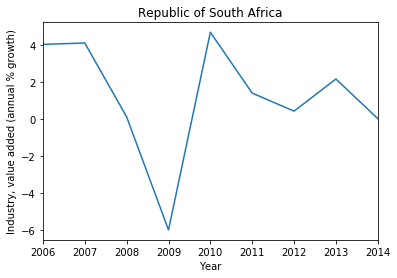

In [24]:
# Plotting...
SA_line_plot = SA_df.plot(kind = "line", 
                   x = "Year", 
                   y = "Industry", 
                   title = "Republic of South Africa", 
                   legend = False)
SA_line_plot.set_ylabel("Industry, value added (annual % growth)")

In [25]:
figure_3 = SA_line_plot.get_figure()
figure_3.savefig("RSA Industry Annual Percentage Growth.png")
# Let's look at a statistical summary of this time period
SA_df.describe()

,Industry
count,9.000000
mean,1.229401
std,3.256512
min,-5.995312
25%,0.123391
50%,1.411877
75%,4.050267
max,4.706814


In [26]:
# The mean is 1.229 during this period. In 2010, the annual % growth was 4.706, which was also the max.
# This is a significant difference between the mean and peak industry/construction during the time period.